اضافه کردن کتابخانه ها

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import urllib
from geopy.distance import geodesic

خواندن دیتاست

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


اطلاعات کلی دیتاست

In [3]:
df.shape

(48895, 16)

اطلاعات آماری ستون های عددی

In [4]:
df[["price","latitude","longitude","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].describe()

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,40.728949,-73.952170,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,0.054530,0.046157,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,40.690100,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,40.723070,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,40.763115,-73.936275,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


بررسی داده های از دست رفته

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

اطلاعات آماری ستون قیمت

In [6]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

حذف رکوردهای با قیمت صفر

In [7]:
df = df[df['price']>0]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


بررسی دوباره قیمت

In [8]:
df['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

شمارش تعداد خانه ها برحسب منطقه

<AxesSubplot:xlabel='neighbourhood_group'>

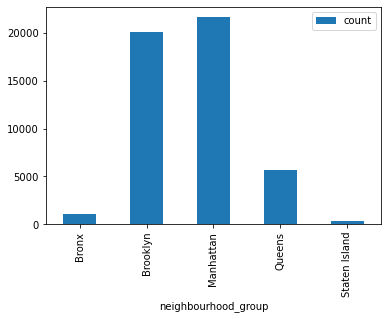

In [9]:
df1 = df.groupby('neighbourhood_group')['id'].agg(['count'])
df1.plot.bar()

نمودار توزیع قیمت

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

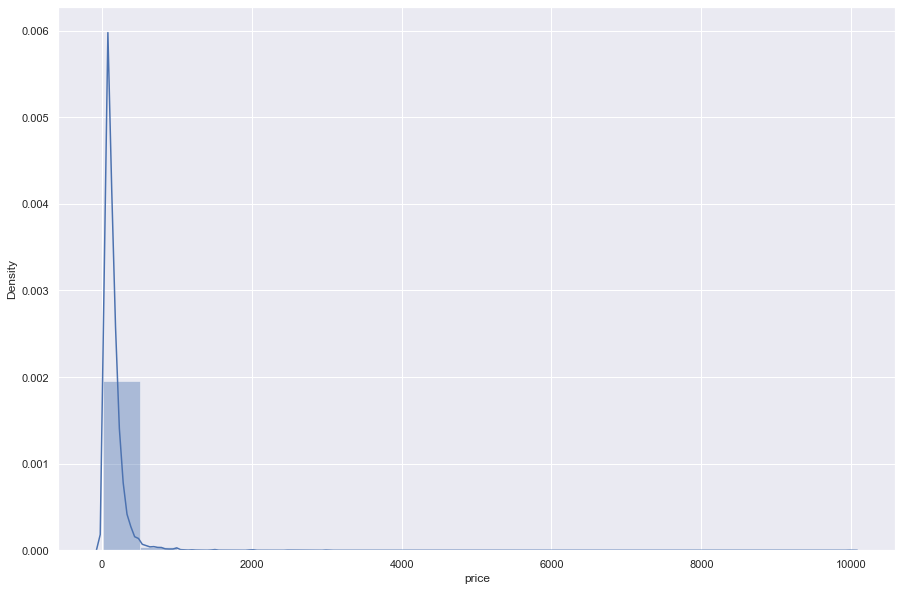

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['price'],kde_kws={"label": 'price'}, bins=20)

نمودار توزیع قیمت در مناطق مختلف

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

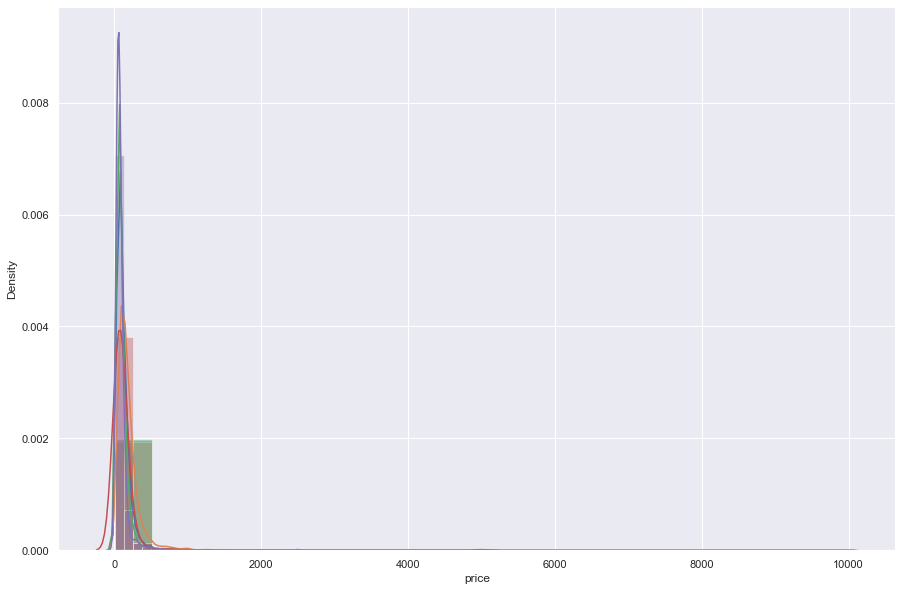

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in df.neighbourhood_group.unique():
    sns.distplot(df.price[df['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

نرمال کردن توزیع قیمت

In [12]:
df['price_log_e'] = np.log(df['price'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log_e
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,4.382027


F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log_e', ylabel='Density'>

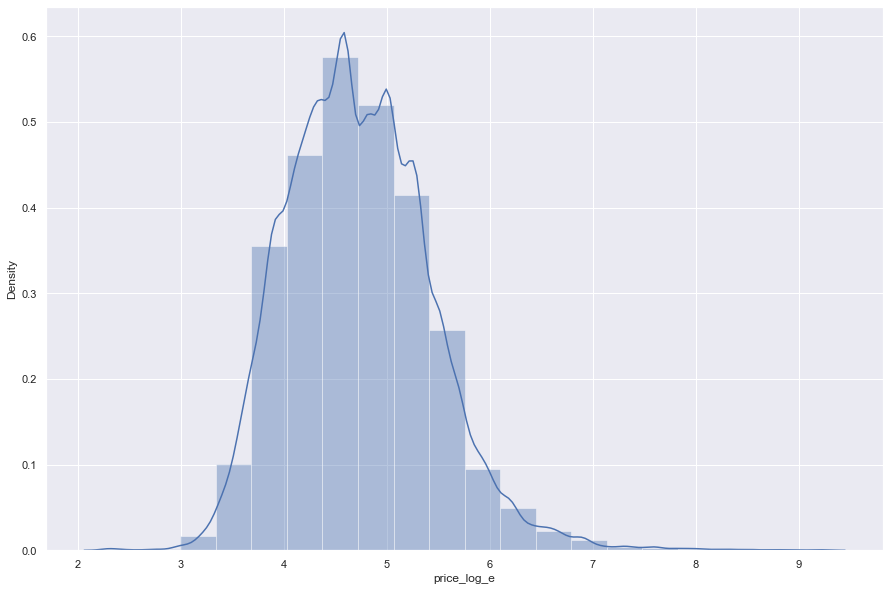

In [13]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['price_log_e'],kde_kws={"label": 'price in log e'}, bins=20)

In [14]:
df['price_log_10'] = np.log10(df['price'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log_e,price_log_10
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,5.003946,2.173186
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,5.416100,2.352183
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,5.010635,2.176091
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,4.488636,1.949390
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,4.382027,1.903090


F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log_10', ylabel='Density'>

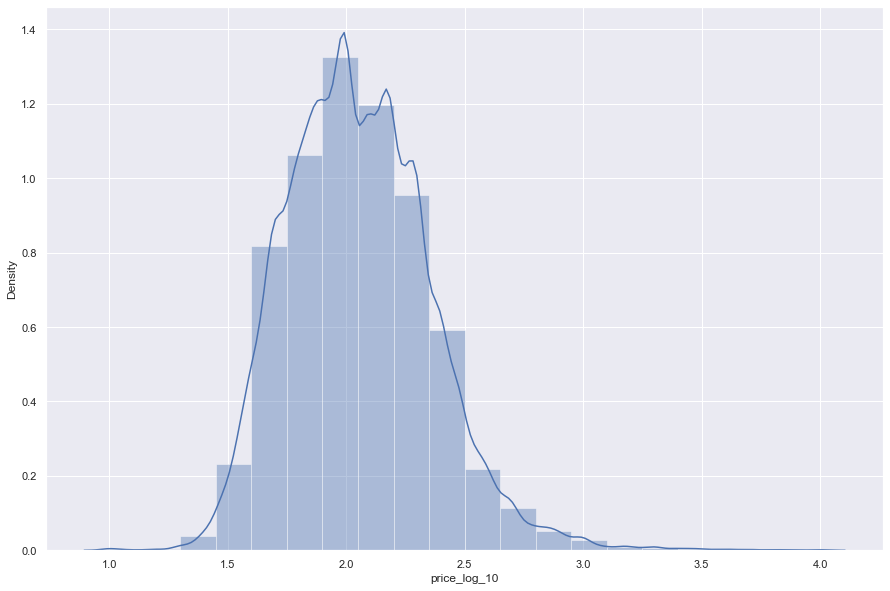

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['price_log_10'],kde_kws={"label": 'price in log 10'}, bins=20)

آزمون قیمت نرمال شده

In [16]:
stats.normaltest(df["price_log_10"])

NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

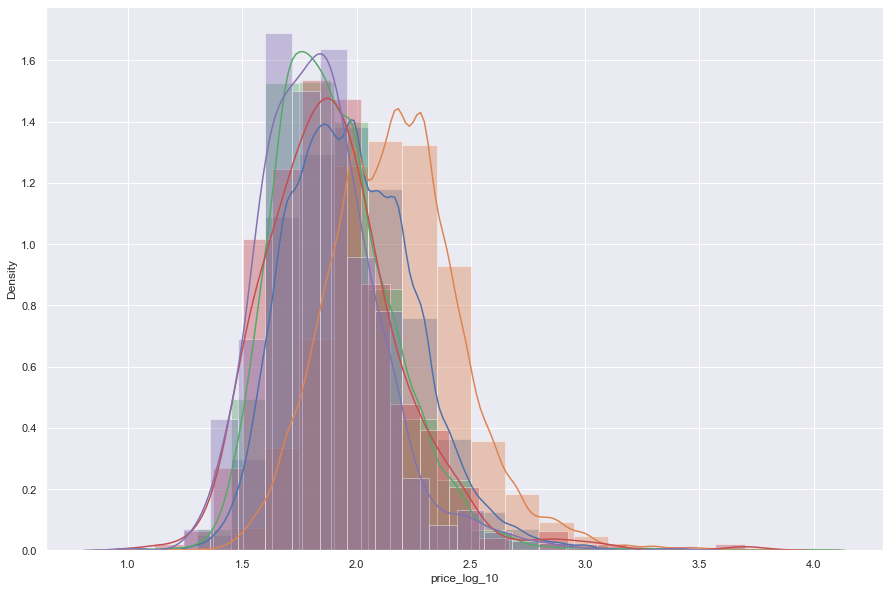

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in df.neighbourhood_group.unique():
    sns.distplot(df.price_log_10[df['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------


F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Test for Normal Distribution for  Manhattan
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------


F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Test for Normal Distribution for  Staten Island
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------


F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


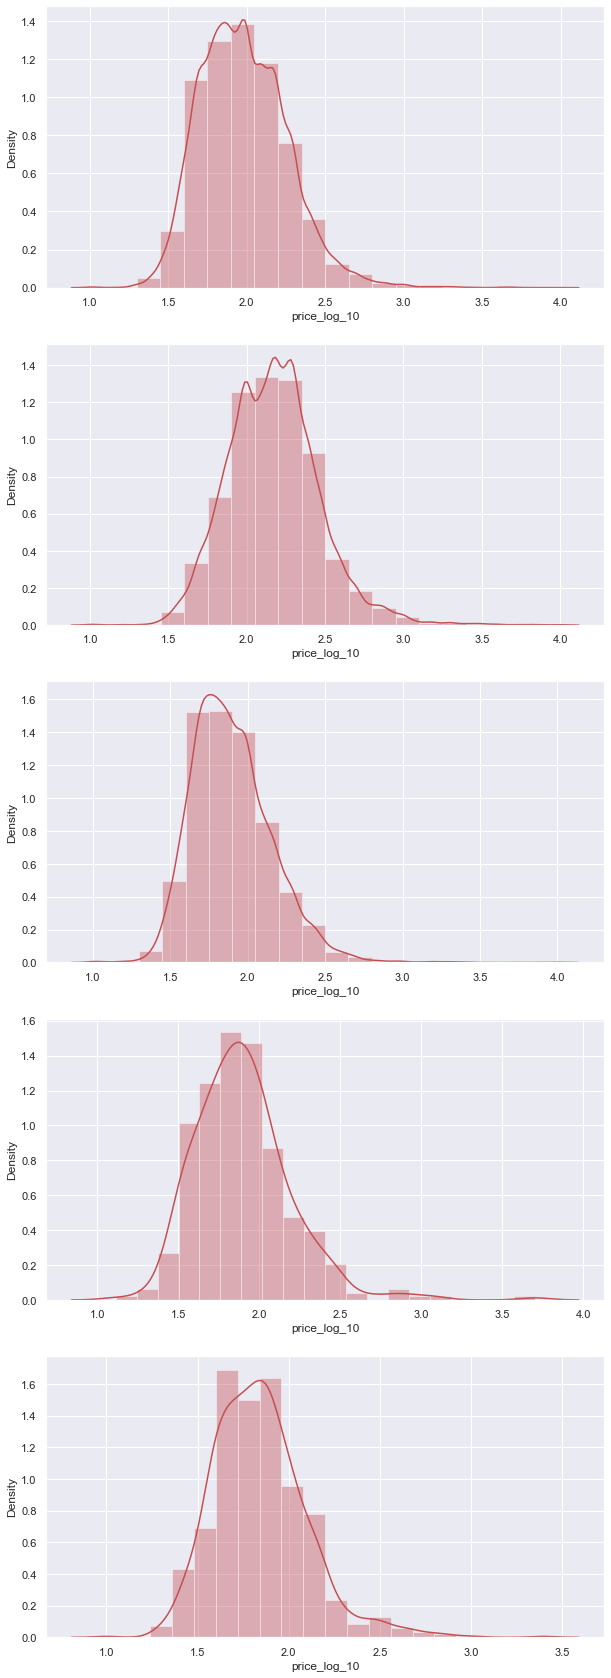

In [18]:
f = plt.figure(figsize=(10,30))
for i, groups in enumerate(df.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sns.distplot(df.price_log_10[df['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=20)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(df["price_log_10"]))
    print('------------------------------------------')

رابطه بین مناطق مختلف و قیمت نرمال شده

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

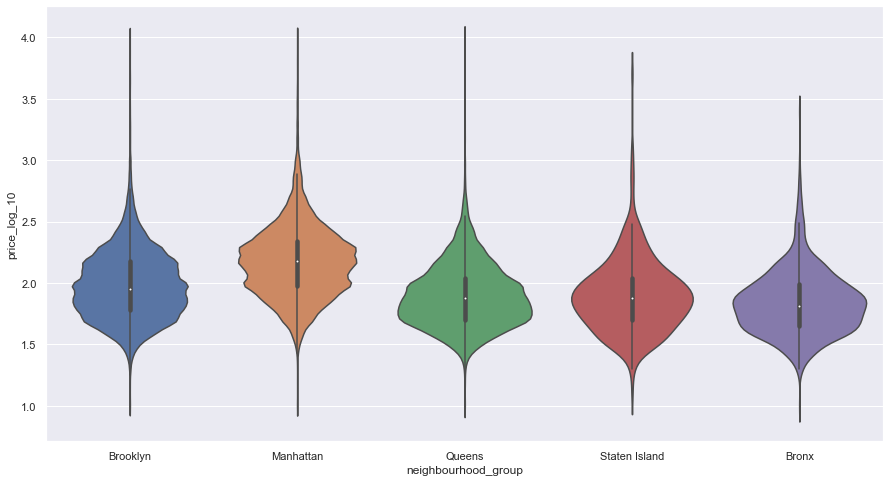

In [19]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "price_log_10", data=df)

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

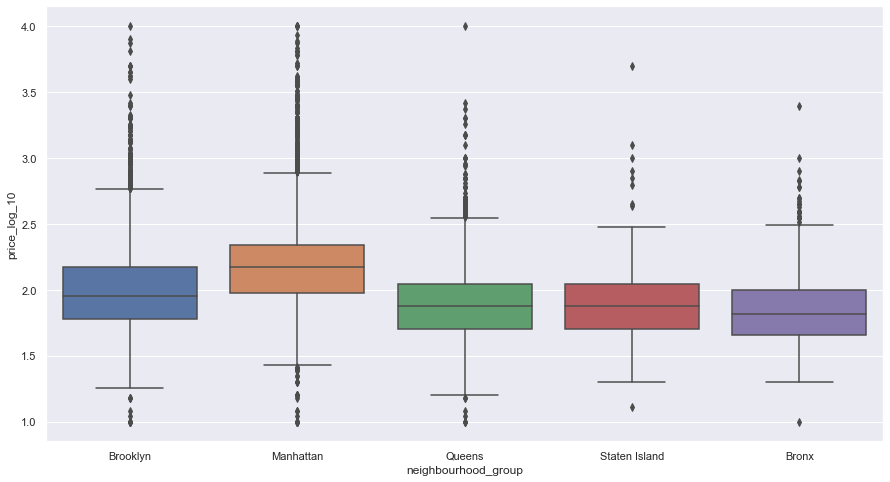

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot("neighbourhood_group", "price_log_10", data=df)

تست آنوا

In [21]:
fstat, pval = stats.f_oneway(*[df.price_log_10[df.neighbourhood_group == s]
for s in df.neighbourhood_group.unique()])
print("Oneway Anova log10(price) ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ neighbourhood_group F=1857.21, p-value=0.000000E+00


In [22]:
df[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1090.0   87.577064  106.725371  10.0  45.0   65.0   
Brooklyn             20095.0  124.438915  186.896837  10.0  60.0   90.0   
Manhattan            21660.0  196.884903  291.386838  10.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                                     
                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

رابطه بین نوع اتاق و قیمت نرمال شده

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

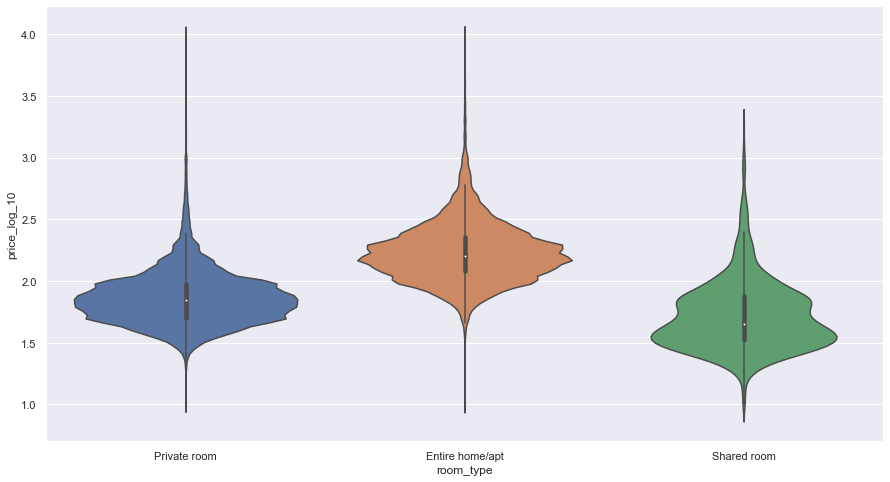

In [23]:
plt.figure(figsize=(15,8))
sns.violinplot("room_type", "price_log_10", data=df)

F:\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

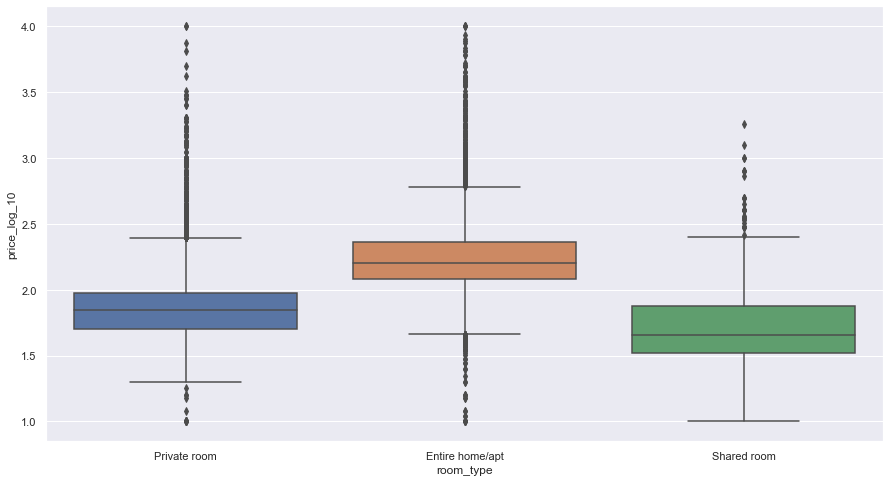

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot("room_type", "price_log_10", data=df)

In [25]:
fstat, pval = stats.f_oneway(*[df.price_log_10[df.room_type == s]
for s in df.room_type.unique()])
print("Oneway Anova log10(price) ~ room_type F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ room_type F=15347.09, p-value=0.000000E+00


<AxesSubplot:xlabel='room_type'>

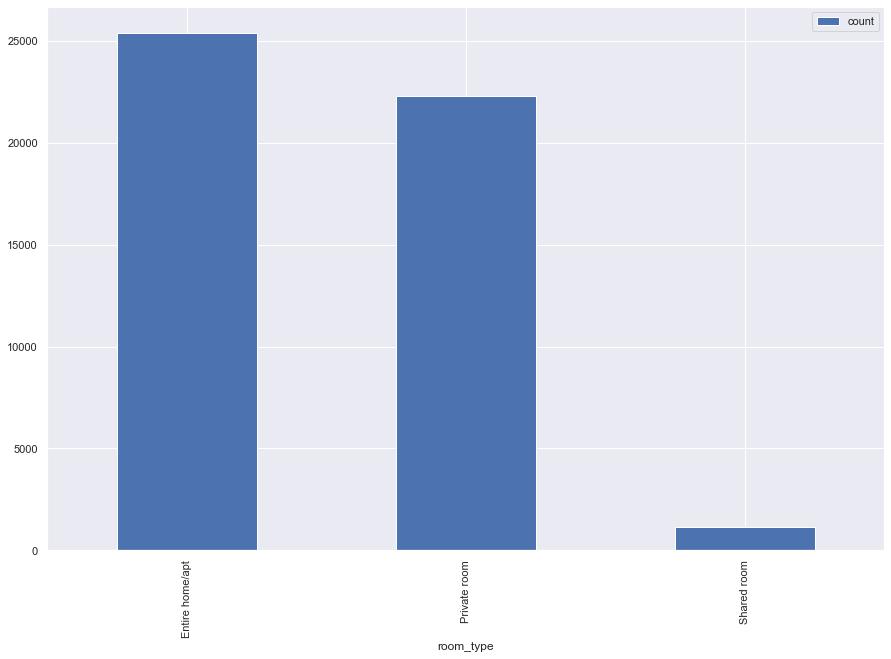

In [26]:
room = df.groupby('room_type')['id'].agg(['count'])
room.plot.bar()

<AxesSubplot:xlabel='host_id'>

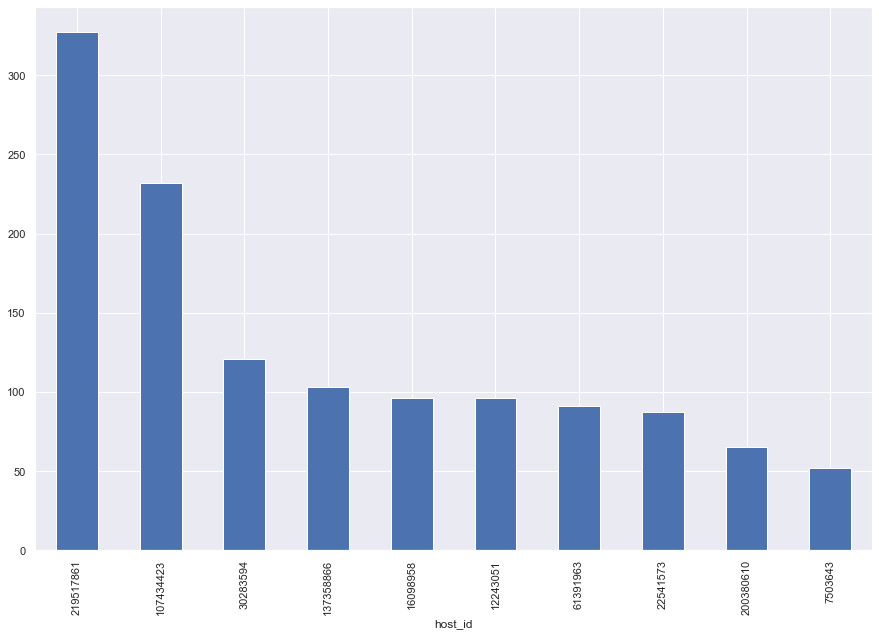

In [27]:
s = df.groupby('host_id').id.agg('count')
s = s.sort_values(ascending=False)[:10]
s.plot.bar()